In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX + ASIA_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

In [3]:
ctv_bt = pickle.load(open("../BT/carry_tovol_all_daily.p", "rb"))
ss_unwind_bt = pickle.load(open("../BT/carry_unwinding_all_daily.p", "rb"))
fsb_bt = pickle.load(open("../BT/bp_skew_all_daily.p", "rb"))
rx_bt = pickle.load(open("../BT/rx_skew_all.p", "rb"))
sgn_bt = pickle.load(open("../BT/value_sgneer_all_daily.p", "rb"))
sgr_bt = pickle.load(open("../BT/value_sgreer_g10_daily.p", "rb"))

In [2]:
cs_unwind_bt = pickle.load(open("../BT/carry_unwinding_credit_daily.p", "rb"))

In [5]:
cs_unwind_bt.model_rtn.corr(ss_unwind_bt.model_rtn)

-0.14487580262672237

# G10

In [5]:
ctv_bt_g10 = copy(ctv_bt)
ss_unwind_bt_g10 = copy(ss_unwind_bt)
fsb_bt_g10 = copy(fsb_bt)
rx_bt_g10 = copy(rx_bt)
sgn_bt_g10 = copy(sgn_bt)
sgr_bt_g10 = copy(sgr_bt)

In [6]:
ctv_bt_g10.model_rtn = ctv_bt_g10.asset_rtn[G10_FX].sum(axis=1)
ss_unwind_bt_g10.model_rtn = ss_unwind_bt_g10.asset_rtn[G10_FX].sum(axis=1)
fsb_bt_g10.model_rtn = fsb_bt_g10.asset_rtn[G10_FX].sum(axis=1)
rx_bt_g10.model_rtn = rx_bt_g10.asset_rtn[G10_FX].sum(axis=1)
sgn_bt_g10.model_rtn = sgn_bt_g10.asset_rtn[G10_FX].sum(axis=1)
sgr_bt_g10.model_rtn = sgr_bt_g10.asset_rtn[G10_FX].sum(axis=1)

In [7]:
bt_list_g10 = [ctv_bt_g10, ss_unwind_bt_g10, fsb_bt_g10, rx_bt_g10, sgn_bt_g10, sgr_bt_g10]
bt_names_g10 = ["carry-to-vol", "ss_unwinding", "FS_skew", "RX_skew", "NEER_dev", "REER_dev"]

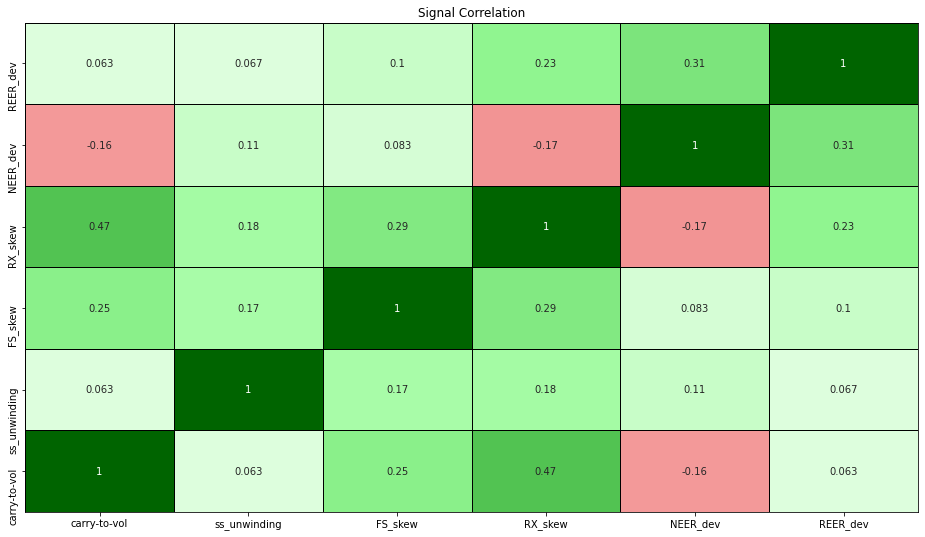

In [8]:
cbt_corrplot(bt_list_g10, bt_names_g10)

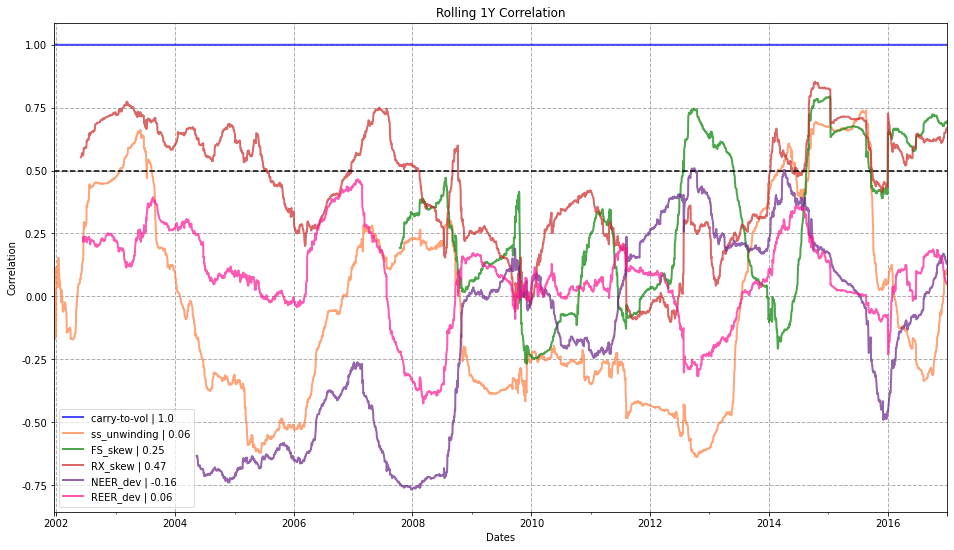

In [9]:
cbt_rolling_cor(bt_list_g10, bt_names_g10, window=252, main="Rolling 1Y Correlation")
plt.axhline(y=0.5, c="black", ls="--")
# plt.axhline(y=0, c="black", ls="--")

In [10]:
[dollar_sharpe(x.model_rtn) for x in bt_list_g10]

[0.6941113600906579,
 0.34061653880029885,
 0.4916000918843696,
 0.5074994520466732,
 0.4995102583706505,
 0.3410765682344997]

# Asia

In [11]:
ctv_bt_asia = copy(ctv_bt)
ss_unwind_bt_asia = copy(ss_unwind_bt)
fsb_bt_asia = copy(fsb_bt)
rx_bt_asia = copy(rx_bt)
sgn_bt_asia = copy(sgn_bt)

In [12]:
ctv_bt_asia.model_rtn = ctv_bt_asia.asset_rtn[[x for x in ASIA_FX if x != "USDCNH"]].sum(axis=1)
ss_unwind_bt_asia.model_rtn = ss_unwind_bt_asia.asset_rtn[ASIA_FX].sum(axis=1)
fsb_bt_asia.model_rtn = fsb_bt_asia.asset_rtn[ASIA_FX].sum(axis=1)
rx_bt_asia.model_rtn = rx_bt_asia.asset_rtn[ASIA_FX].sum(axis=1)
sgn_bt_asia.model_rtn = sgn_bt_asia.asset_rtn[ASIA_FX].sum(axis=1)

In [13]:
bt_list_asia = [ctv_bt_asia, ss_unwind_bt_asia, fsb_bt_asia, rx_bt_asia, sgn_bt_asia]
bt_names_asia = ["carry-to-vol", "ss_unwinding", "FS_skew", "RX_skew", "NEER_dev"]

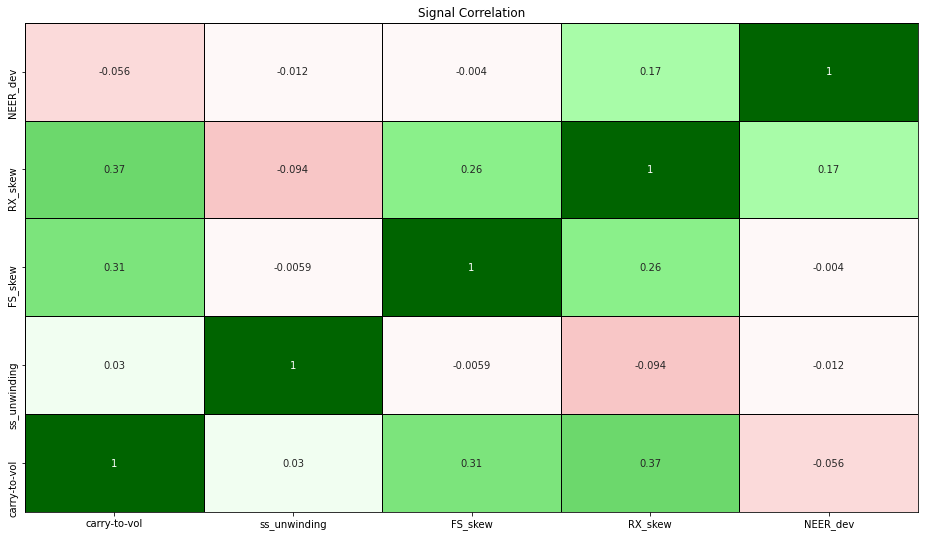

In [14]:
cbt_corrplot(bt_list_asia, bt_names_asia)

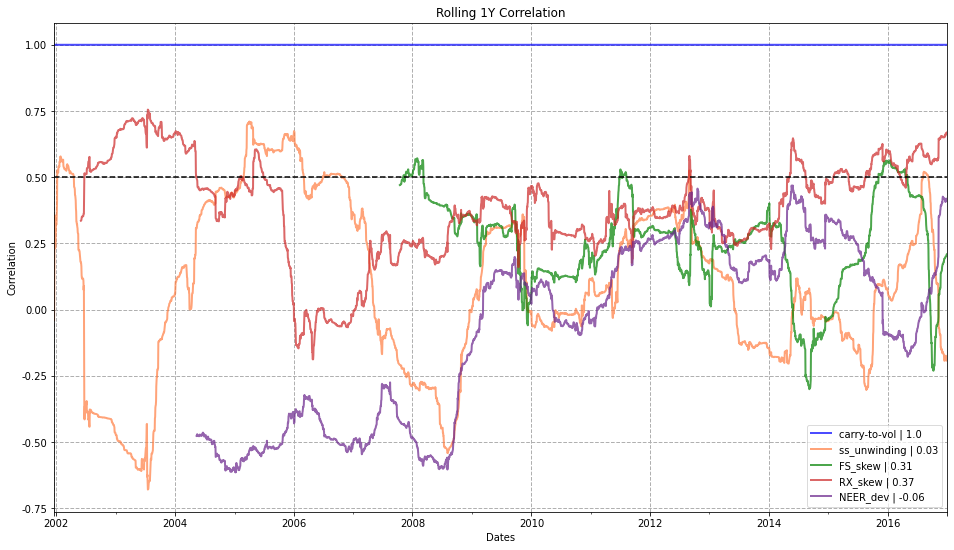

In [15]:
cbt_rolling_cor(bt_list_asia, bt_names_asia, window=252, main="Rolling 1Y Correlation")
plt.axhline(y=0.5, c="black", ls="--")

In [16]:
[dollar_sharpe(x.model_rtn) for x in bt_list_asia]

[0.4424622128992912,
 0.6603249985995752,
 0.07502777664014779,
 0.1251275669573245,
 0.5853666478111521]

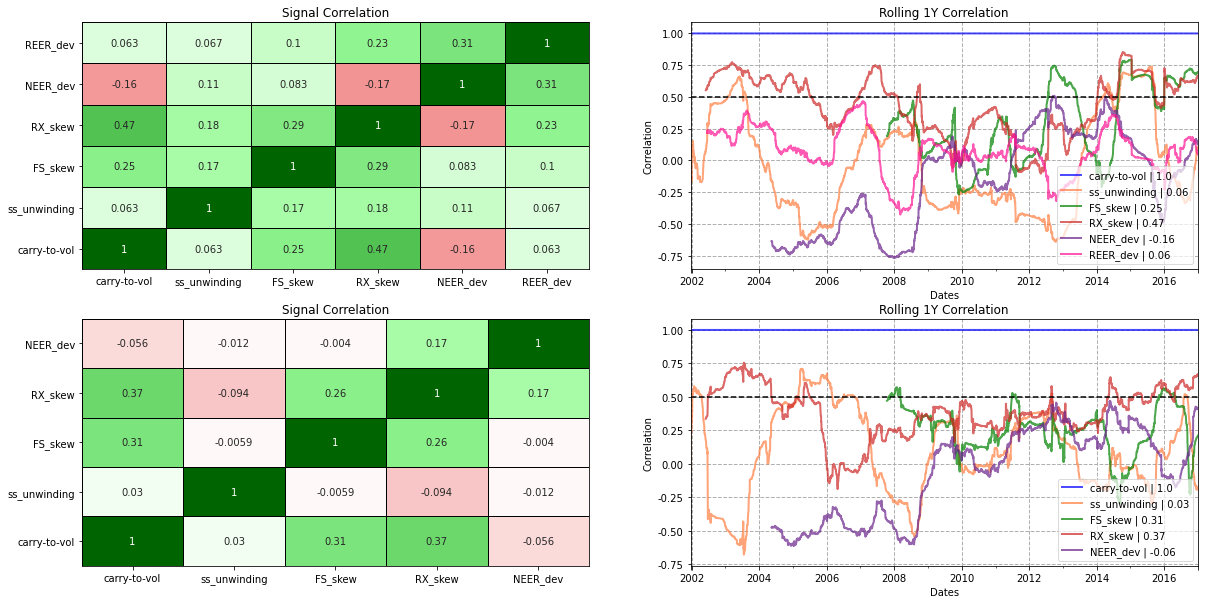

In [17]:
gs = GridSpec(nrows = 2, ncols = 2)
fig = plt.figure(figsize=(20, 10))
# fig.suptitle(t, fontsize=30, y=.925)

fig.add_subplot(gs[0]).set_label(cbt_corrplot(bt_list_g10, bt_names_g10))
fig.add_subplot(gs[1]).set_label(cbt_rolling_cor(bt_list_g10, bt_names_g10, window=252, main="Rolling 1Y Correlation"))
plt.axhline(y=0.5, c="black", ls="--")
fig.add_subplot(gs[2]).set_label(cbt_corrplot(bt_list_asia, bt_names_asia))
fig.add_subplot(gs[3]).set_label(cbt_rolling_cor(bt_list_asia, bt_names_asia, window=252, main="Rolling 1Y Correlation"))
plt.axhline(y=0.5, c="black", ls="--")

# Cbt

In [18]:
bt_list = [ctv_bt, ss_unwind_bt, fsb_bt, rx_bt, sgn_bt, sgr_bt]
bt_names = ["carry-to-vol", "ss_unwinding", "FS_skew", "RX_skew", "NEER_dev", "REER_dev"]

In [19]:
combine_bt = CombinedBacktest(bt_list = bt_list,
                              bt_wts = range(len(bt_list)),
                              asset_returns = total_returns,
                              tcost = abs(total_returns*0),
                              settings = settings, method="naive",
                              settings_inject={"rebalance_period":"daily"})

Using `naive` method, `bt_wts` ignored


In [20]:
combine_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [21]:
get_summary(combine_bt)

Returns   : 0.11035379957542592
Vol       : 0.12144885312507332
SR        : 0.9086442295324005
Max DD    : -38.5

C Returns : 0.10839944068675962
C SR      : 0.9801711153713387
C Max DD  : -33.77

Hit rate  : 0.538
W | N | L : 0.54 | 0.0 | 0.46
W/L Ratio : 1.16


In [22]:
get_returns_stats(combine_bt.asset_rtn, combine_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR,USDMYR,USDCNH
annualized_return,0.694915,0.710514,0.624778,0.523433,0.952018,0.604217,0.483872,0.319064,0.481005,-0.480683,2.188568,-2.06916,-0.256654,2.111391,1.884959,1.149259,-0.223609,4.304946
sharpe,0.708043,0.575375,0.5876,0.337204,0.612327,0.683809,0.66105,0.260866,0.161343,-0.139793,0.460145,-0.298916,-0.167945,0.842876,0.69179,0.36045,-0.079737,0.759833
dollar_sharpe,0.70143,0.555246,0.579191,0.339896,0.604821,0.675691,0.658798,0.253359,0.148079,-0.154136,0.395536,-0.390654,-0.180785,0.82186,0.621054,0.332947,-0.109385,0.669654
trade_sharpe,0.708043,0.575375,0.5876,0.337204,0.612327,0.683809,0.66105,0.260866,0.161343,-0.139793,0.460145,-0.298916,-0.167945,0.842876,0.69179,0.36045,-0.079737,0.759833
long_sharpe,0.906631,0.657362,1.059729,1.15037,0.880372,0.855178,0.538506,-0.000455,0.171563,-0.048986,-1.541222,-0.440538,-0.639094,0.311672,-0.17631,0.55956,-0.218975,-0.760146
short_sharpe,0.687555,0.572537,-0.034887,0.108926,-0.33872,0.674226,0.845949,0.880831,-1.568663,-0.740857,1.111018,0.947775,0.198811,1.006771,0.822185,0.340142,0.145169,1.605126
sortino,0.401951,0.349848,0.453166,0.200847,0.417786,0.419436,0.422609,0.153308,0.086488,-0.080155,0.273445,-0.139784,-0.093426,0.483832,0.420591,0.182527,-0.043916,0.485398
max_drawdown,-2.156247,-2.797682,-2.044233,-6.750882,-3.323815,-2.86965,-2.729464,-5.627231,-8.989759,-14.760384,-29.394863,-61.009713,-11.155174,-4.30441,-11.433483,-6.742419,-13.895201,-18.372237
max_drawdown_start,2006-01-31,2010-05-20,2003-09-02,2009-11-16,2013-10-07,2008-03-13,2005-11-16,2003-09-02,2010-06-07,2002-03-26,2009-09-07,2002-04-12,2004-05-10,2005-05-05,2011-08-01,2011-06-07,2006-03-09,2012-11-14
max_drawdown_end,2006-03-28,2014-04-25,2004-12-30,2010-05-18,2015-08-05,2008-10-27,2007-12-20,2007-11-08,2014-05-06,2011-08-16,2011-06-28,2012-11-12,2008-10-08,2005-07-04,2013-09-03,2015-09-28,2006-05-10,2014-03-06


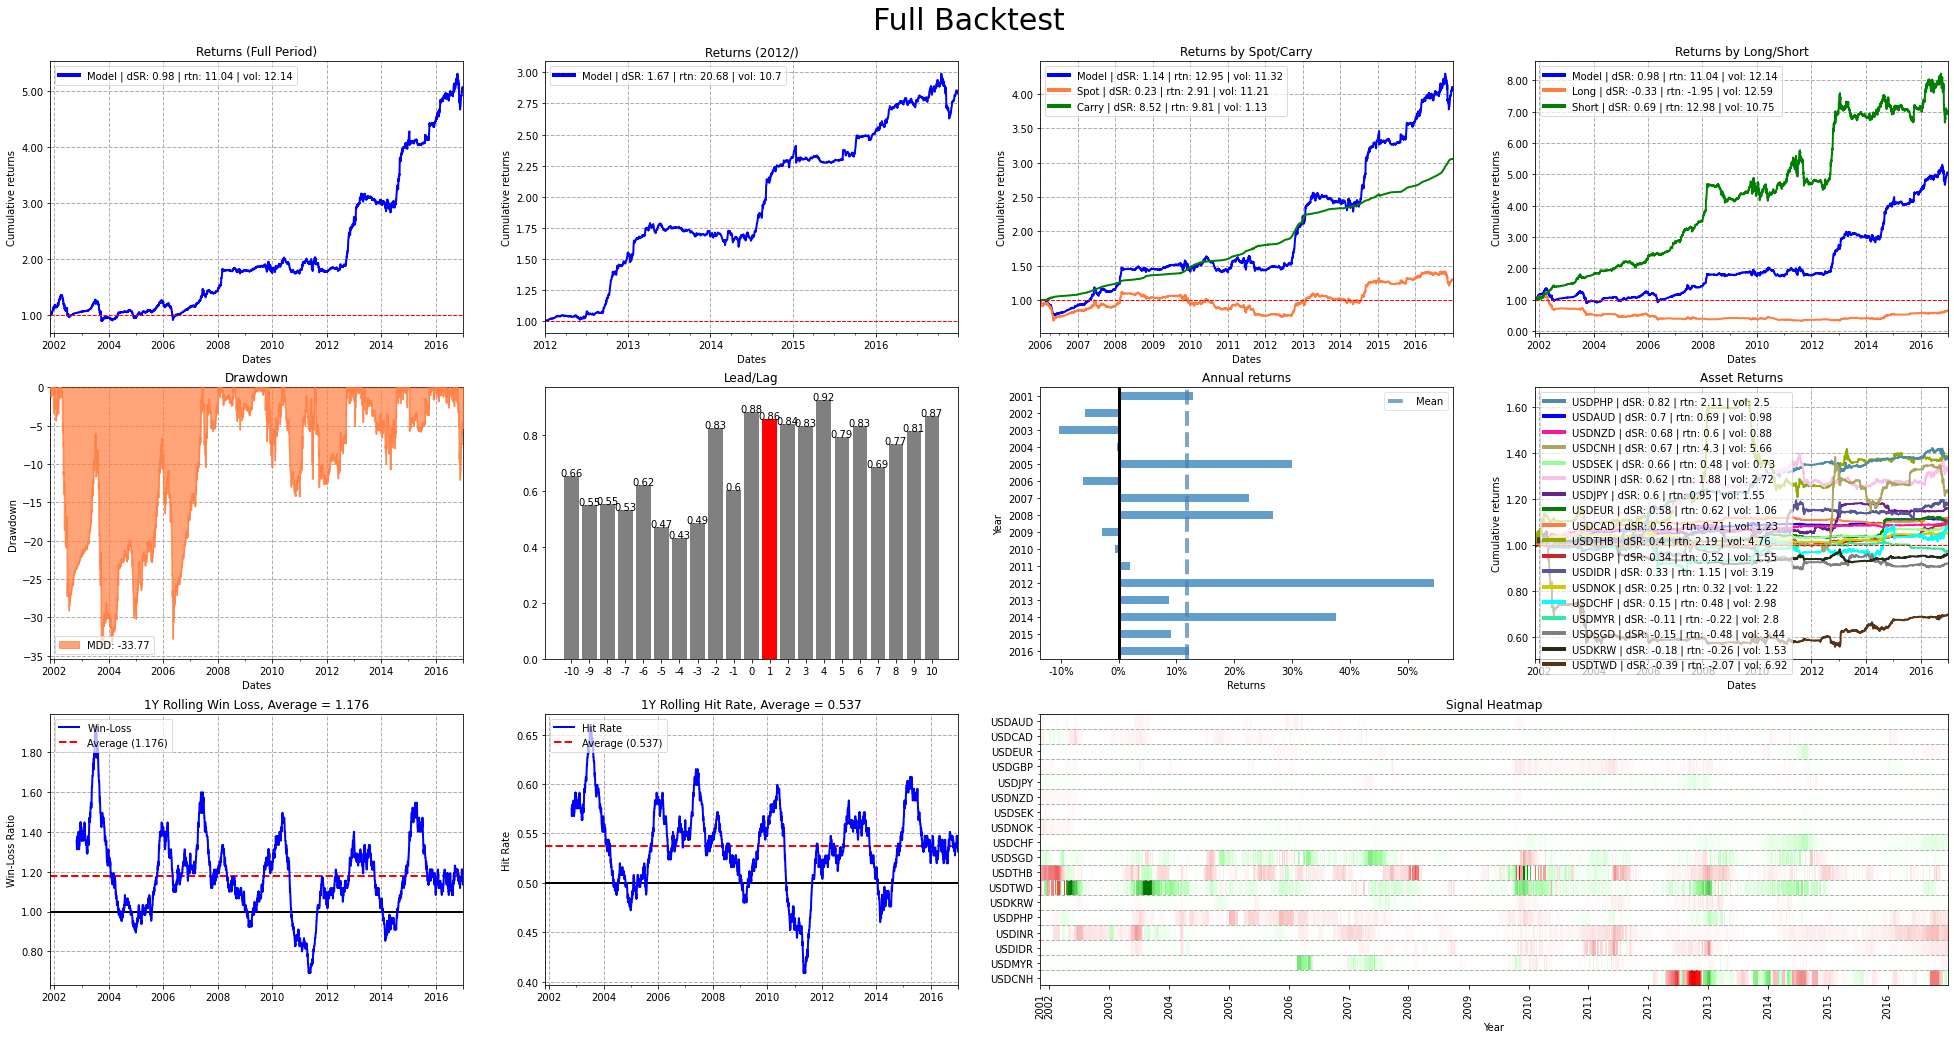

In [23]:
plot_bt(combine_bt)

<AxesSubplot:xlabel='Dates', ylabel='Cumulative returns'>

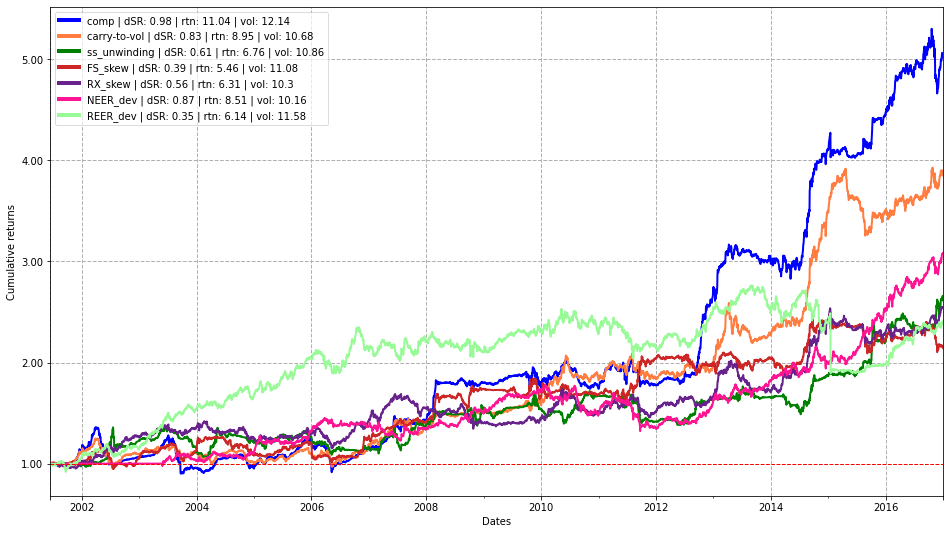

In [31]:
fin = pd.concat([x.model_rtn for x in [combine_bt] + bt_list], axis=1)
fin.columns = ["comp"] + bt_names
gen_plot_rtn(fin)

# Heuristic

In [33]:
list_of_wts = [[0.6/3, 0.4/3, 0.2/3, 0.8/3, 0.2/3, 0.8/3],
                [0.6/2, 0.4/2, 0.2/4, 0.8/4, 0.2/4, 0.8/4],
                [0.6/4, 0.4/4, 0.2/2, 0.8/2, 0.2/4, 0.8/4],
                [0.6/4, 0.4/4, 0.2/4, 0.8/4, 0.2/2, 0.8/2]]


In [34]:
cbts = [CombinedBacktest(bt_list = bt_list,
                              bt_wts = x,
                              asset_returns = total_returns,
                              tcost = abs(total_returns*0),
                              settings = settings, method="heuristic",
                              settings_inject={"rebalance_period":"daily"}) for x in list_of_wts]

In [35]:
for b in cbts:
  b.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [36]:
heuristics = pd.concat([x.model_rtn for x in cbts], axis=1)
heuristics.columns = ["1/3", "carry_focused", "skew_focused", "MR_focused"]

<AxesSubplot:xlabel='Dates', ylabel='Cumulative returns'>

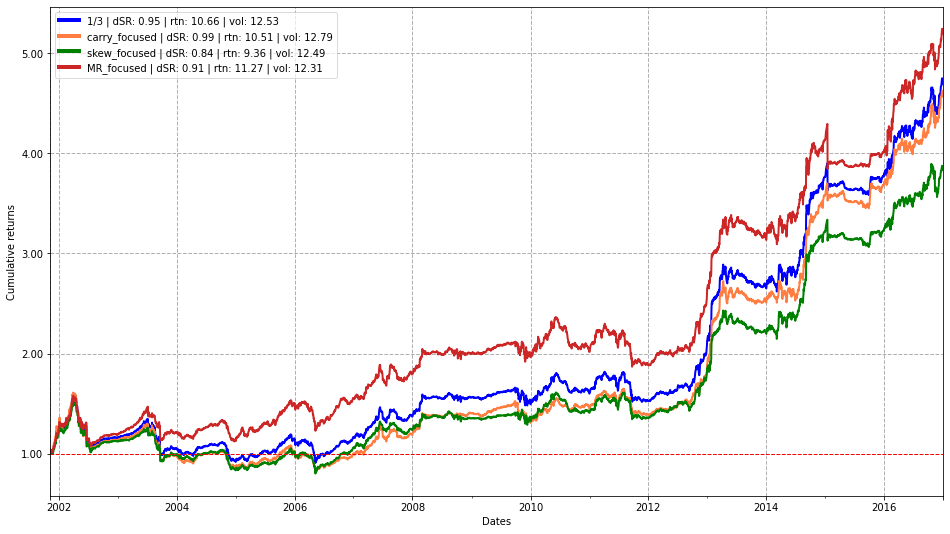

In [37]:
gen_plot_rtn(heuristics)

In [ ]:
combine_bt = CombinedBacktest(bt_list = bt_list,
                              bt_wts = [0.6/3, 0.4/3, 0.4/3, 0.6/3, 0.2/3, 0.8/3],
                              asset_returns = total_returns,
                              tcost = abs(total_returns*0),
                              settings = settings, method="heuristic",
                              settings_inject={"rebalance_period":"daily"})
combine_bt.run()
plot_bt(combine_bt)

# Linreg

In [34]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [35]:
tmp = sgr_bt.wts.copy()

In [36]:
tmp.loc[:,ASIA_FX] = np.nan

In [37]:
sgr_bt.wts = tmp

In [39]:
store = []
for col in list(total_returns):
  if col == "USDCNH":
    continue
  tor = pd.concat([total_returns.pipe(fill_date)[col]]+[x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
  tor = tor.dropna(axis=1,how="all")
  les = ["x" + str(x+1) for x in range(len(list(tor))-1)]
  tor.columns = ["y"] + les
  tor = tor.pipe(omit_leading_na).pipe(omit_trailing_na)
  
  endog = tor.y
  exog = sm.add_constant(tor[les])
  exog = exog.dropna(axis=1,how="all")
  rols = RollingOLS(endog, exog, window=252)
  rres = rols.fit()
  params = rres.params.copy()
  params.index = np.arange(1, params.shape[0] + 1)
  
  rr = params[les]
  rr = rr.pipe(omit_leading_na)
  ss = tor[les].iloc[rr.index[0]-1:]
  rr.index = ss.index

  tt = params.const.pipe(omit_leading_na)
  tt.index = ss.index
  
  sig = (rr.mul(ss,1).sum(1) + tt)
  store.append(sig)

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x

In [40]:
lr_sig = pd.concat(store, axis=1)
lr_sig.columns = [x for x in list(total_returns) if x != "USDCNH"]

<AxesSubplot:xlabel='Dates'>

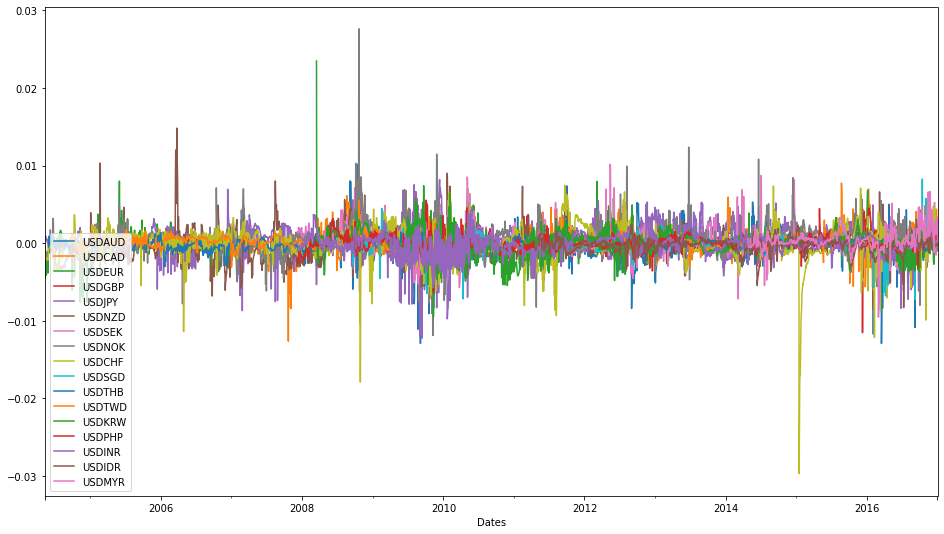

In [41]:
lr_sig.plot()

In [42]:
lr_bt = Backtest(signal = lr_sig, asset_returns = total_returns.drop("USDCNH", 1), tcost = abs(total_returns*0), settings = settings)
lr_bt.run()

C:\Users\vin_s\AppData\Local\Temp/ipykernel_50332/2382986942.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  lr_bt = Backtest(signal = lr_sig, asset_returns = total_returns.drop("USDCNH", 1), tcost = abs(total_returns*0), settings = settings)


Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [43]:
get_summary(lr_bt)

Returns   : 0.03802979122232507
Vol       : 0.11387572549998748
SR        : 0.33395871732408194
Max DD    : -25.76

C Returns : 0.032052181051997336
C SR      : 0.2677560455744083
C Max DD  : -23.96

Hit rate  : 0.519
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.08


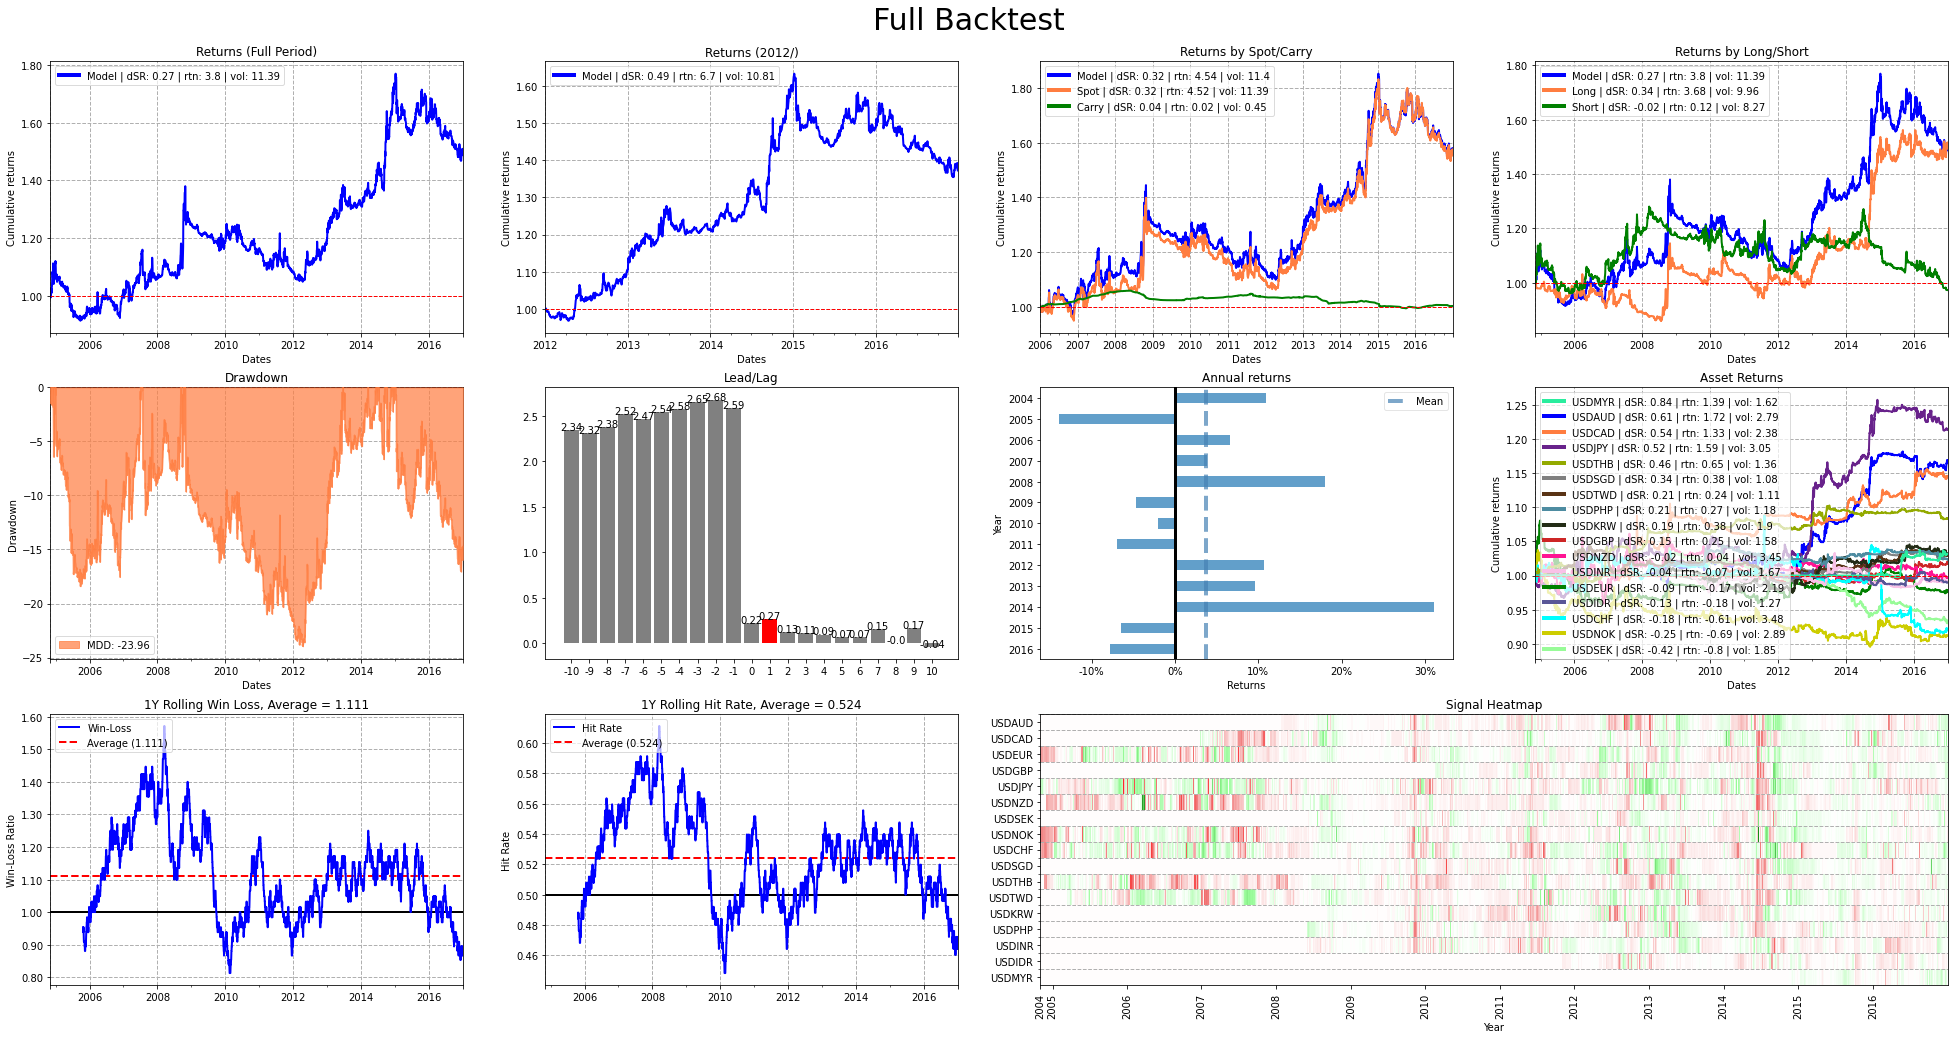

In [44]:
plot_bt(lr_bt)

# PCA

In [117]:
for col in list(total_returns):
  if col == "USDCNH":
    continue
  tor = pd.concat([x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
  tor = tor.dropna(axis=1, how="all")
  tor.columns = ["x" + str(x+1) for x in range(len(list(tor)))]
  input_data = tor.pipe(omit_leading_na).pipe(omit_trailing_na)
  input_data.to_csv("Signals/{}.csv".format(col), index=False)

In [52]:
for b in bt_list:
  for col in list(total_returns):
    if col not in list(b.wts):
      b.wts[col] = 0

Re-arranging asset columns
Portfolio scaling ...
    Grouping by [ALL]
Returns   : 0.010529203709921697
Vol       : 0.11696343525918837
SR        : 0.09002132749084546
Max DD    : -42.18

C Returns : 0.0037847342657684633
C SR      : 0.029731016624039104
C Max DD  : -35.98

Hit rate  : 0.506
W | N | L : 0.51 | 0.0 | 0.49
W/L Ratio : 1.02


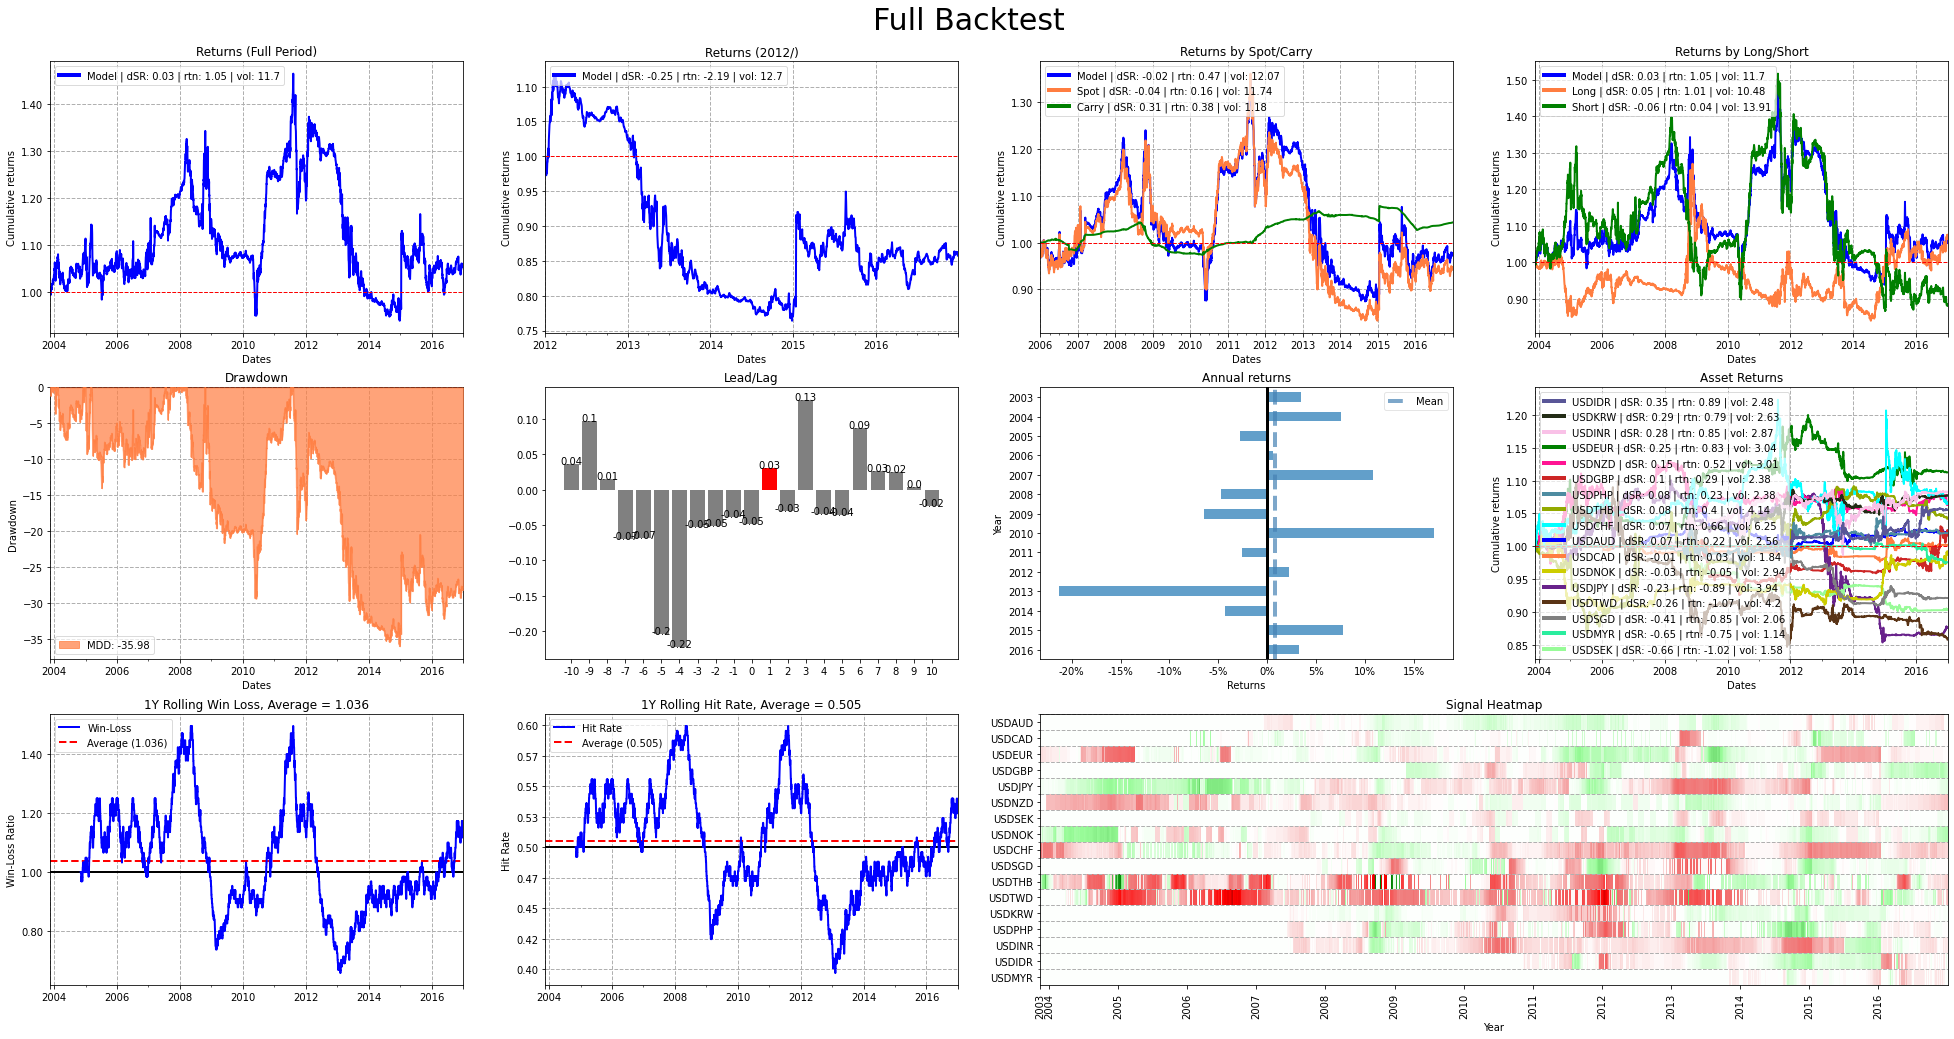

In [54]:
new_store1=[]
for col in list(total_returns):
  if col == "USDCNH":
    continue
  tor = pd.concat([x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
  loadings = pd.read_csv("nPC1/"+col+".csv")
  loadings.index = tor.tail(loadings.shape[0]).index
  new_store1.append(loadings.iloc[:,0])
pc1_sig = pd.concat(new_store1,axis=1)
pc1_sig.columns = [x for x in list(total_returns) if x != "USDCNH"]

scaled_sig1 = (pc1_sig)#*(0.1/rolling_vol(spot_returns.pipe(fill_date, True).drop("USDCNH",axis=1), 252))
pc1_bt = Backtest(signal = scaled_sig1, 
                  asset_returns = total_returns.drop("USDCNH",axis=1), 
                  tcost = abs(total_returns*0), settings = settings, settings_inject= {"asset_scaling_target":None})
pc1_bt.run()

get_summary(pc1_bt)

plot_bt(pc1_bt)

In [71]:
# new_store2=[]
# for col in list(total_returns):
#   if col == "USDCNH":
#     continue
#   tor = pd.concat([x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
#   loadings = pd.read_csv("PC2/"+col+".csv")
#   loadings.index = tor.tail(loadings.shape[0]).index
#   new_store2.append(loadings.iloc[:,0])
  
# pc2_sig = pd.concat(new_store2, axis=1)
# pc2_sig.columns = [x for x in list(total_returns) if x != "USDCNH"]

# scaled_sig2 = (pc2_sig*-1)#*(0.1/rolling_vol(spot_returns.drop("USDCNH",axis=1), 252))

# pc2_bt = Backtest(signal = scaled_sig2, 
#                   asset_returns = total_returns.drop("USDCNH",axis=1), 
#                   tcost = abs(total_returns*0), settings = settings)
# pc2_bt.run()

# get_summary(pc2_bt)

# plot_bt(pc2_bt)

In [72]:
# new_bt = Backtest(signal = (scaled_sig1 + scaled_sig2), 
#                   asset_returns = total_returns.drop("USDCNH",axis=1), 
#                   tcost = abs(total_returns*0), settings = settings)
# new_bt.run()
# get_summary(new_bt)
# plot_bt(new_bt)

In [64]:
sig = total_returns*0-1

In [65]:
short_only = Backtest(signal = sig,
                      asset_returns = total_returns,
                      tcost = abs(total_returns*0),
                      settings = settings,
                      settings_inject={"rebalance_period":"daily"})
short_only.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [66]:
get_summary(short_only)

Returns   : 0.0584781389274033
Vol       : 0.10403790817977858
SR        : 0.5620849164551874
Max DD    : -42.26

C Returns : 0.05448938274367251
C SR      : 0.3046156807807679
C Max DD  : -36.16

Hit rate  : 0.525
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.1


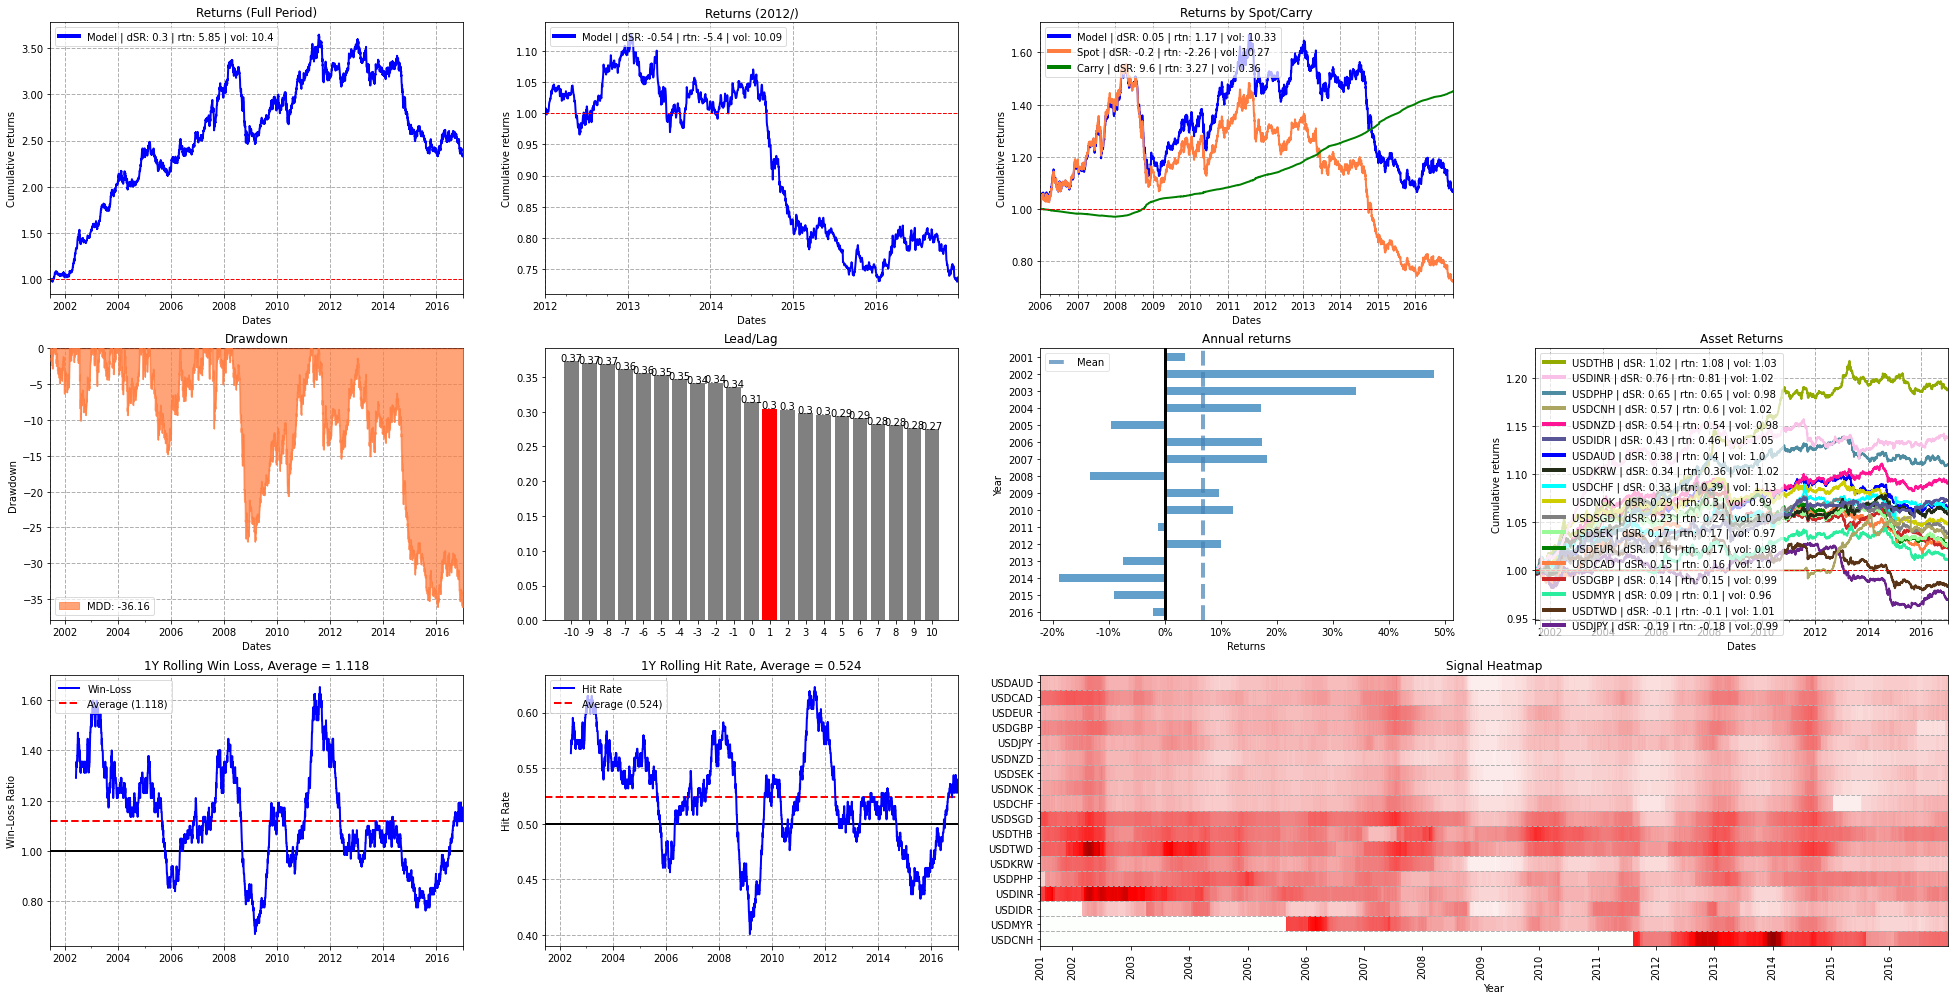

In [70]:
gs = GridSpec(nrows = 3, ncols = 4)
fig = plt.figure(figsize=(34, 17))
# fig.suptitle(t=t, fontsize=30, y=.925)

fig.add_subplot(gs[0]).set_label(gen_plot_rtn(short_only.model_rtn, main = "Returns (Full Period)"))
fig.add_subplot(gs[1]).set_label(gen_plot_rtn(short_only.model_rtn["2012":], main = "Returns (2012/)"))
fig.add_subplot(gs[2]).set_label(gen_rtn_component(short_only, spot_returns_usd.loc[:short_only.model_rtn.index[-1], short_only.wts.columns], carry_returns_usd.loc[:short_only.model_rtn.index[-1], short_only.wts.columns]))
# fig.add_subplot(gs[3]).set_label(gen_rtn_longshort(short_only))

fig.add_subplot(gs[4]).set_label(gen_drawdown(short_only))
fig.add_subplot(gs[5]).set_label(gen_leadlag(short_only, nlag=10))
fig.add_subplot(gs[6]).set_label(pf.plot_annual_returns(short_only.model_rtn))

try:
  fig.add_subplot(gs[7]).set_label(gen_rtn_asset(short_only))
except:
  pass

fig.add_subplot(gs[8]).set_label(gen_rolling_winloss(short_only.model_rtn))
fig.add_subplot(gs[9]).set_label(gen_rolling_hitrate(short_only.model_rtn))
fig.add_subplot(gs[10:]).set_label(gen_signal(short_only))

In [ ]:
# from sklearn.decomposition import PCA
# store = []
# for col in list(total_returns):
#   if col == "USDCNH":
#     continue
#   tor = pd.concat([x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
#   tor.columns = ["x1", "x2", "x3", "x4", "x5", "x6"]
#   input_data = tor.pipe(omit_leading_na).pipe(omit_trailing_na)
#   break
#   window = 252
#   df_new = pd.DataFrame(np.zeros((input_data.shape[0] - window + 1, input_data.shape[1])) )

#   def rolling_pca(window_data):
#     main = input_data.iloc[window_data]
#     main = main.dropna(axis=0, how="all").dropna(axis=1, how="any")

#     main = PCA().fit(main)
#     df_new.iloc[int(window_data.iloc[0])] = main.components_[:,0]

#     return True
#   df_idx = pd.DataFrame(np.arange(input_data.shape[0]))
#   _ = df_idx.rolling(window).apply(rolling_pca)
#   store.append(df_new)

# new_store = []
# for dt in store:
#   a = dt.copy()
#   d = abs(a.iloc[1:] - a.shift(1).iloc[1:]).sum(1)
#   d1 = abs(a.iloc[1:] + a.shift(1).iloc[1:]).sum(1)
#   signs = pd.concat([pd.Series(1), (pd.Series(-1,index=a.index[1:]) ** (d1 <= d)).cumprod()])
#   signs.index = signs.index
#   res = a.mul(signs, 0)

#   dtc = res.copy()
#   dtc.index = tor.tail(dtc.shape[0]).index
#   new_store.append(dtc.iloc[:,0])